# 연습 1. CCTV와 인구 관계 분석


In [170]:
# 필요 라이브러리 import
import pandas as pd
import numpy as np


In [171]:
# 변수 실행시 마지막 변수만 보여주던 것을 모든 변수를 보여주도록 설정 변경

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 1. data 읽어오기

### 1) CCTV data 읽어오기
* [CCTV data](https://data.seoul.go.kr/dataList/OA-2734/C/1/datasetView.do) 
    * 서울 열린데이터 광장의 서울시 자치구 년도별 CCTV 설치 현황 활용
* `pandas.read_csv()`를 이용해 파일 읽어오기


In [172]:
CCTV_Seoul = pd.read_csv('../data/CCTV_Seoul.csv')
CCTV_Seoul
print('data의 shape',CCTV_Seoul.shape)
CCTV_Seoul.head()
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


data의 shape (25, 6)


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [173]:
# CCTV_Seoul의 컬럼명 확인
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

기관명의 경우, 추후 불러올 데이터의 컬럼명과 헷갈릴 수 있으므로, 변경하기로 함.
* 컬럼명 변경은 `DataFrame.rename()`으로 변경이 가능함
    * parameter 
        * `columns` : 딕셔너리 형태로 {바꿀 위치(`df.columns[index]` : 새로운값}으로 가능
        * `inplace` : 원본 반영이 안되는 것이 원칙이나 이 옵션을 True로 주면, 원본이 바로 변경됨

In [174]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## 2) 서울시 인구현황 가져오기
* [서울시 인구현황](https://data.seoul.go.kr/dataService/boardList.do#submenu1) 
    * 서울 열린데이터광장의 구별 인구 데이터 사용

In [175]:
pop_Seoul = pd.read_excel('../data/population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


해당 기간에서의 자치구별 인구 데이터임을 알 수 있다. 하지만, HEADER 부분이 정렬되지 않아 조금의 수정이 필요하다.  
현재 df의 경우 0행까지는 Skip해도 되고, 2행을 Header로 사용하면 될 것 같다.  
또한, 열의 경우에는 현재 인구 합계와 고령자 columns만 가져오기로 한다.  
`pandas.read_excel()`에서 `header`와 `usecols` 인수를 통해 가져온다

In [176]:
pop_Seoul = pd.read_excel('../data/population_in_Seoul.xls', header=2, usecols='B, D, G, J, N')
pop_Seoul.head()
pop_Seoul.tail()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,자치구,계,계.1,계.2,65세이상고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN



가져온 데이터의 컬럼이 어떤 의미를 하는지 구분이 안되므로,  
구별, 인구수, 한국인, 외국인, 고령자로 변경하도록한다

In [177]:
pop_Seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


합계 행의 경우 다른 데이터들과 성격이 다르다(전체 자치구의 합계를 표현)  
따라서 제거하는 것이 좋다.


In [178]:
# 합계 행 제거
pop_Seoul.drop(0, axis=0, inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


## 2. 데이터 확인하기

### - CCTV data
#### 1) CCTV_Seoul : 구별 cctrv 설치 대수 확인
* 총 cctv 설치대수 별로 정렬해 상위 5개, 하위 5개 확인

In [179]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head()
CCTV_Seoul.sort_values(by='소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


2016년도까지는 강남구가 가장 많은 CCTV를 보유하고 있는 자치구이고,   
도봉구가 가장 적게 설치되어 있다.  
  
#### 2) 최근 3개년 동안 CCTV 설치가 증가했는지를 확인하고 증가율 기준으로 정렬
* 최근 3개년 설치 대수 : 2014+2015+2016 
* 최근 증가율 : (2014+2015+2016) / 2013 * 100 


In [180]:
CCTV_Seoul = CCTV_Seoul.assign(최근증가율 = lambda x: x['2016년'] + x['2015년'] + x['2014년'] / x['2013년도 이전'] * 100)
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,1549.281734
1,강동구,1010,379,99,155,377,558.121372
2,강북구,831,369,120,138,204,374.520325
3,강서구,911,388,258,184,81,331.494845
4,관악구,2109,846,260,390,613,1033.732861
5,광진구,878,573,78,53,174,240.612565
6,구로구,1884,1142,173,246,323,584.148862
7,금천구,1348,674,51,269,354,630.566766
8,노원구,1566,542,57,451,516,977.516605
9,도봉구,825,238,159,42,386,494.806723


In [181]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,1549.281734
4,관악구,2109,846,260,390,613,1033.732861
8,노원구,1566,542,57,451,516,977.516605


도봉구는 가장 적게 CCTV가 설치되어있지만, 최근 증가율은 2위로 최근에 많이 증가하고 있다는 것을 알 수 있다.

### - Population data(서울시 인구)




In [182]:
pop_Seoul.head()
pop_Seoul.tail()


,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


마지막에 NaN값이 있는 것을 알 수 있다. 
이 경우, 각 구별 데이터가 중복되지 않았는지 확인한다.  : `unique()` 중복 데이터 제거 후 반환  
중복되지 않았다면, 필요 없는 데이터로 간주, 제거

In [183]:
print(len(pop_Seoul), len(pop_Seoul['구별'].unique()))

26 26


In [184]:
# 구별 값이 nan인 행 반환
pop_Seoul[pop_Seoul['구별'].isnull()]

# 26행 제거
pop_Seoul.drop([26], inplace=True)
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


#### 1) 가공데이터 생성
* 전체 인구수 대비 외국인 비율

In [185]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100

* 전체 인구수 대비 고령자 비율

In [186]:
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [187]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


#### 2) 데이터 정렬해보기

* 인구가 많은 상위 5개 지역

In [188]:
# 인구가 많은 5개 지역
pop_Seoul.sort_values(by='인구수', ascending=False).head()

# 인구가 적은 5개 지역
pop_Seoul.sort_values(by='인구수', ascending=True).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


송파구가 인구수가 가장 많고, 중구가 가장 적은 인구수를 보이는 것을 알 수 있다.    
이를 통해 송파구는 주거 지역이 많고, 중구는 상업 지구인 것을 유추해볼 수 있다.

* 외국인이 많은 5개 구, 비율이 높은 구

In [189]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


영등포구가 외국인 수와 비율 모두 가장 높지만, 다른 지역은 조금씩 차이가 있는 것을 알 수 있다.   
  
* 고령자가 많은 5개 구, 비율이 높은 구

In [190]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


절대적인 수로는 강서구가 높지만, 비율로 봤을 때는 강북구가 많은 것을 알 수 있다.  
중구, 용산구는 외국인과 고령자 비율이 상위권을 기록하는 것을 알 수 있다.  
또한, 중구, 용산구는 인구가 적은데, 외국인 고령자의 비율이 높은 것을 알 수 있다.


## 3. 데이터 병합
각 자치구별 인구와 CCTV 설치 대수를 함께 비교, 확인해보기 위해서 데이터를 병합  
이후 각 연도별 CCTV 수는 필요없기 때문에 삭제하도록 한다.

In [191]:
result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [192]:
# 연도별 CCTV 대수 열 삭제
result.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True)

In [193]:
result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


'구별' 컬럼은 unique하기 때문에, 행 인덱스로 설정하면 그래프 그릴 때 축 데이터로 바로 지정된다. 인덱싱할때 유리

In [194]:
# 구별 컬럼을 index로 지정
result.set_index('구별', inplace=True)

In [195]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 4. 데이터 비교

* 가장 간단히 해 볼 방법은, 다수의 데이터 중 상관관계가 가장 높은 데이터를 비교해보는 것.

* 인구수와 관련된 각 필드 CCTV 소계와 상관계수를 파악해서 상관성 있는 데이터를 그래프로 표현
    * 상관관계 계산 
    * `numpy.corrcoef(data1, data2)` : 데이터 두개 비교
    * `dataframe.corr()` : 전체 dataframe 열끼리의 상관관계를 계산한 df 반환
    
 
* 반환되는 결과값이 절댓값을 기준으로,
    * 0.1 이하면 무시
    * 0.3보다 이하면 약한 상관관계,
    * 0.7이하면 강한 상관관계
   

### 1) 소계(CCTV 총 대수) vs 인구수

In [196]:
np.corrcoef(result['소계'], result['인구수'])


array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

### 2) 소계 vs 고령자비율

In [197]:
np.corrcoef(result['소계'], result['고령자비율'])


array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

### 3) 소계 vs 외국인비율

In [198]:
np.corrcoef(result['소계'], result['외국인비율'])


array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

인구수와 고령자비율은 각각 약한 양의 상관관계, 약한 음의 상관관계를 보인다.  
그에 반해 외국인 비율은 무의미한 관계를 보인다.


## 5. 그래프 그려보기
* 위의 결과에서 약하지만 양과 음의 상관관계를 보여준 '인구수'와 '고령자비율'과 '소계' 간의 그래프를 그려 확인해본다.

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [200]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 고정
plt.rcParams["figure.figsize"] = (10, 6)

In [201]:
# 사용할 df 한번 더 확인
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 1) 구별 CCTV 설치 대수에 대한 그래프
* 수평 막대 그래프(barh) 사용

<AxesSubplot:ylabel='구별'>

Text(0.5, 0, 'CCTV 설치 대수')

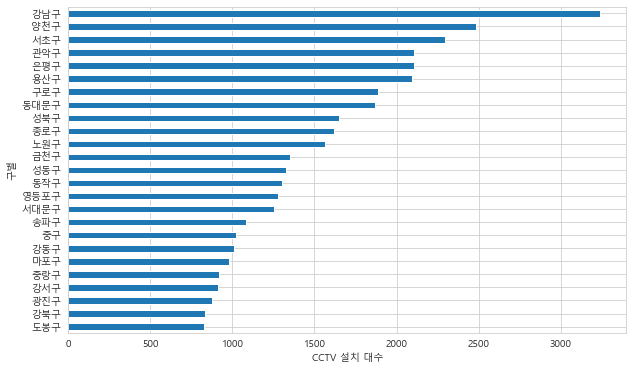

In [202]:
temp = result.sort_values(by='소계')['소계']
temp.plot(kind='barh', grid=True)
plt.xlabel('CCTV 설치 대수')
plt.show()

<BarContainer object of 25 artists>

Text(0.5, 0, 'CCTV 설치 대수')

Text(0, 0.5, '구별')

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

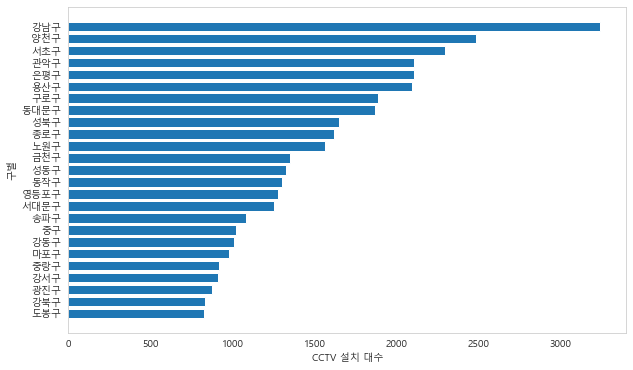

In [203]:
# barh()를 사용해서도 가능
plt.barh(temp.index, temp)
plt.grid()
plt.xlabel('CCTV 설치 대수')
plt.ylabel('구별')
plt.grid
plt.show()

각 구별 설치 대수를 시각적으로 한눈에 알아 볼 수 있다.  

### 2) 인구수 대비 CCTV가 많이 설치되어 있는 지역을 찾기
 * 인구수 대비 CCTV가 많이 설치되어 있는 지역을 찾기
 1. CCTV는 강남구가 가장 많이 설치되어 있음.
 2. 인구수, 외국인비율, 고령자비율과 CCTV와의 상관관계를 확인했을 때 인구수와 고령자 비율이 약한 상관관계를 보임
 3. 인구수 대비 CCTV 설치 대수를 이용해 그래프를 작성
 4. 각 구별 인구 대비 CCTV 설치 비율을 확인할 수 있는 가공데이터 인구수 대비 CCTV 비율 계산

In [204]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [205]:
result['CCTV비율'] = result['소계'] / result['인구수'] * 100
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,831,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,2109,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


<AxesSubplot:ylabel='구별'>

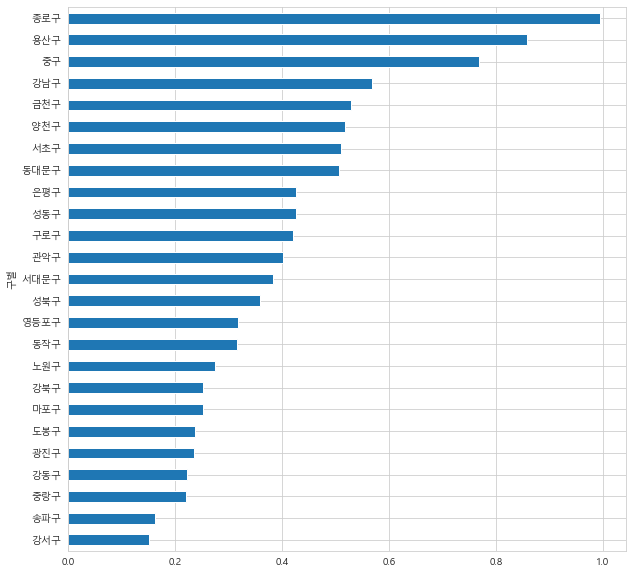

In [206]:
# CCTV 비율이 높은 지역순으로 그래프 작성
result.sort_values(by='CCTV비율')['CCTV비율'].plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

강남구가 설치대수가 많았지만, 인구수 대비한 비율에서는 높지는 않은 것을 알 수 있다.  
종로구는 인구 수 대비해 설치대수가 많은 것을 알 수 있다.  
이는 상위 비율을 차지한 곳이 대부분 상업지구인 것을 유추해볼 수 있다.(주거지역이 적고 유동인구가 많은 대표지역)  
(**2016년 Data이므로 현재와는 다를 수 있다**)  
  
### 3) Scatter 그래프

#### 3-1)인구 수와 CCTV 소계를 이용한 분산그래프 그리기

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV 대수')

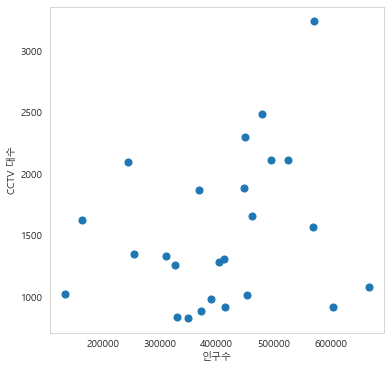

In [207]:
plt.figure(figsize=(6, 6))
plt.scatter(result['인구수'], result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid()
plt.show()

#### 3-2) 인구 수와 CCTV 수를 이용해 최소오차 직선식 계수 구하기
* `np.polyfit(x, y, n)`
    * [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
    * y에 대한 x의 그래프에서 오차가 가장 적은 n차 방정식의 계수를 반환
    
* `np.poly1d(계수)` 
    * [documentation](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)
    * 계수를 이용해서 방정식을 함수로 구성

In [208]:
# polyfit()
fp1 = np.polyfit(result['인구수'], result['소계'], deg=1)
fp1

# poly1d()
f1 = np.poly1d(fp1)
f1

# 인구수
fx = np.linspace(100000, 700000, 100)

array([1.15151285e-03, 1.04561312e+03])

poly1d([1.15151285e-03, 1.04561312e+03])

In [209]:
f1(fx)

array([1160.76440422, 1167.74326996, 1174.72213569, 1181.70100143,
       1188.67986717, 1195.65873291, 1202.63759864, 1209.61646438,
       1216.59533012, 1223.57419586, 1230.55306159, 1237.53192733,
       1244.51079307, 1251.48965881, 1258.46852454, 1265.44739028,
       1272.42625602, 1279.40512175, 1286.38398749, 1293.36285323,
       1300.34171897, 1307.3205847 , 1314.29945044, 1321.27831618,
       1328.25718192, 1335.23604765, 1342.21491339, 1349.19377913,
       1356.17264487, 1363.1515106 , 1370.13037634, 1377.10924208,
       1384.08810781, 1391.06697355, 1398.04583929, 1405.02470503,
       1412.00357076, 1418.9824365 , 1425.96130224, 1432.94016798,
       1439.91903371, 1446.89789945, 1453.87676519, 1460.85563093,
       1467.83449666, 1474.8133624 , 1481.79222814, 1488.77109387,
       1495.74995961, 1502.72882535, 1509.70769109, 1516.68655682,
       1523.66542256, 1530.6442883 , 1537.62315404, 1544.60201977,
       1551.58088551, 1558.55975125, 1565.53861699, 1572.51748

우리가 가지고 있는 데이터를 가장 잘 설명하는 1차 방정식을 만들고,   
이를 함수화하여 10만부터 70만명의 인구수에 맞는 y_hat을 확인

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV 대수')

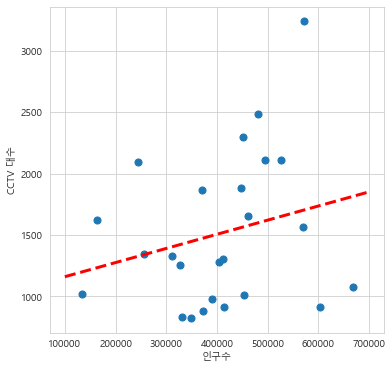

In [210]:
plt.figure(figsize=(6, 6))
plt.scatter(result['인구수'], result['소계'], s=50)
plt.plot(fx, f1(fx), 'r--', lw=3)
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid(True)
plt.show()

* 위 그래프의 직선의 의미는 인구 수가 400000일 때 CCTV 대수는 1500개 정도여야 한다.
* 직선보다 위쪽은 일반보다 많은 지역
* 직선보다 아래쪽은 일반보다 적게 설치된 지역

**확실히 알기 위해서는 더 가다듬어야 하지만, 기초를 위해서 간단히 구성**

* `seaborn`의 `lmplot()`으로 쉽게 확인할 수 있다.

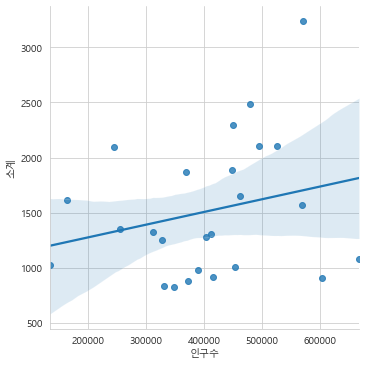

In [211]:
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.lmplot(data=result, x='인구수', y='소계')
plt.show()

#### 3-3) 각 구별 인구수에 적절한 CCTV 대수를 계산
* 우리가 구한 함수에 각 구의 인구수를 대입해 적절한 CCTV 대수를 계산

In [212]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,831,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,2109,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


In [213]:
f1(result['인구수'])

array([1702.55119857, 1567.51674158, 1425.83344942, 1740.86433401,
       1650.75039317, 1474.16474662, 1561.34578424, 1339.34331951,
       1701.26611024, 1447.08346749, 1471.09251034, 1520.63519906,
       1494.29894874, 1422.34551701, 1564.15086953, 1404.014584  ,
       1576.7599352 , 1814.22836898, 1598.31395267, 1509.65552407,
       1326.81601125, 1614.90725279, 1233.10244125, 1199.04069124,
       1522.91864903])

* 각 구에 설치된 CCTV 대수와 이상적인 CCTV 대수의 오차 계산

In [214]:
result['소계'] - f1(result['인구수'])

구별
강남구     1535.448801
강동구     -557.516742
강북구     -594.833449
강서구     -829.864334
관악구      458.249607
광진구     -596.164747
구로구      322.654216
금천구        8.656680
노원구     -135.266110
도봉구     -622.083467
동대문구     398.907490
동작구     -218.635199
마포구     -514.298949
서대문구    -168.345517
서초구      732.849130
성동구      -77.014584
성북구       74.240065
송파구     -733.228369
양천구      883.686047
영등포구    -232.655524
용산구      769.183989
은평구      493.092747
종로구      385.897559
중구      -176.040691
중랑구     -606.918649
Name: 소계, dtype: float64

* 오차의 절댓값이 큰 상위 10개의 지역을 확인

In [215]:
# 오차 데이터 필드 생성
result['오차'] = np.abs(result['소계'] - f1(result['인구수']))
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
강동구,1010,558.121372,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,557.516742
강북구,831,374.520325,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,594.833449
강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
관악구,2109,1033.732861,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,458.249607


In [220]:
# 오차열을 기준으로 내림차순 정렬 후 저장 및 상위 10개 구만 확인 
df_sort = result.sort_values(by='오차', ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,1549.281734,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
양천구,2482,504.704829,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
강서구,911,331.494845,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
용산구,2096,525.935673,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
송파구,1081,534.969754,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369
서초구,2297,745.166430,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093,732.849130
도봉구,825,494.806723,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,622.083467
중랑구,916,309.772102,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,0.220988,606.918649
광진구,878,240.612565,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,596.164747


#### 3-4) 오차가 큰 상위 10개 도시 표시하기
* 그래프에 글자를 출력하는 함수
    * `plt.text(x좌표, y좌표, text, fontsize)`
        * 점보다 약간 오른쪽 아래에 출력되도록 좌표를 변경 후 출력
        

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV 대수')

Text(581910.0, 3173.24, '강남구')

Text(489577.56, 2432.36, '양천구')

Text(615847.4400000001, 892.78, '강서구')

Text(249087.06, 2054.08, '용산구')

Text(680832.66, 1059.3799999999999, '송파구')

Text(459316.2, 2251.06, '서초구')

Text(355618.92, 808.5, '도봉구')

Text(422793.06, 897.68, '중랑구')

Text(379607.28, 860.4399999999999, '광진구')

Text(336795.84, 814.38, '강북구')

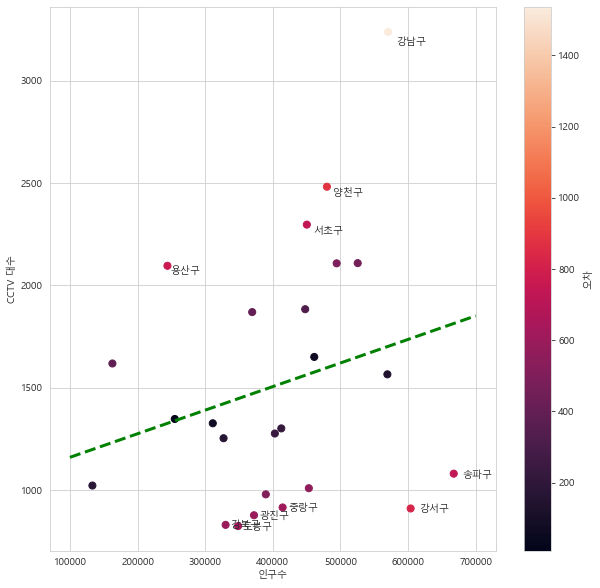

In [239]:
plt.figure(figsize=(10, 10))
plt.scatter(result['인구수'], result['소계'], s=50, c=result['오차'])
plt.colorbar(label='오차')
plt.plot(fx, f1(fx), 'g--', lw=3)
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid(True)
for i in range(10):
    plt.text(df_sort['인구수'][i]*1.02, df_sort['소계'][i]*0.98, df_sort.index[i], fontsize=10)
plt.show()

In [240]:
# DataFrame 결과 파일 csv로 내보내기
result.to_csv('CCTV_result.csv')